In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA

In [2]:
data = pd.read_csv(r'index2018.csv')
data_copy = data.copy()
data_copy.date = pd.to_datetime(data_copy.date,dayfirst = True)
data_copy.set_index('date',inplace = True)
data_copy = data_copy.asfreq('b')
data_copy = data_copy.fillna(method = 'ffill')

In [3]:
data_copy['market_value'] = data_copy.ftse

In [4]:
data_copy.drop(['spx','dax','ftse','nikkei'],axis = 1,inplace = True)
train_size = int(len(data_copy)*0.8)
train_data,test_data = data_copy.iloc[:train_size],data_copy.iloc[train_size:]

## ACF

In [5]:
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

Text(0, 0.5, 'Correlation value')

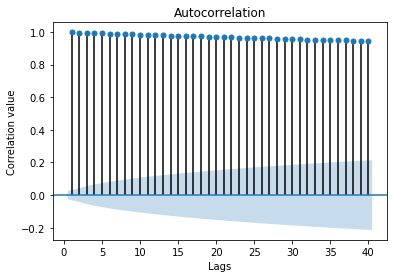

In [9]:
sgt.plot_acf(data_copy.market_value,lags = 40,zero = False)
plt.xlabel('Lags')
plt.ylabel('Correlation value')

## PACF

Text(0, 0.5, 'Correlation value')

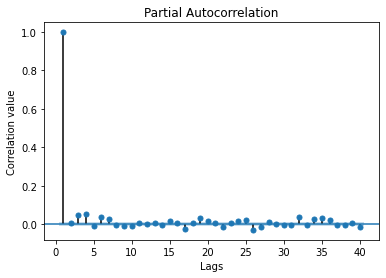

In [6]:
sgt.plot_pacf(data_copy.market_value,lags = 40,alpha = 0.45,zero = False, method = ('ols'))
plt.xlabel('Lags')
plt.ylabel('Correlation value')

## Fitting the ARMA model for AR

In [7]:
from statsmodels.tsa.arima_model import ARMA

In [8]:
## Using lag value 
arma_model = ARMA(data_copy.market_value,order = (1,0))   ## 1 is the lag, 0 means no residuals are considered

In [9]:
results = arma_model.fit()

In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(1, 0)   Log Likelihood              -34438.047
Method:                       css-mle   S.D. of innovations             58.378
Date:                Fri, 31 Jul 2020   AIC                          68882.094
Time:                        10:01:08   BIC                          68902.328
Sample:                    01-07-1994   HQIC                         68889.105
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5720.0011    761.613      7.510      0.000    4227.267    7212.735
ar.L1.market_value     0.9991      0.001   1607.382      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
-----------------------------------------------------------------------------
"""

standard error - how far the values are from the original one.
z value - significance test statistic
p value - 0.005
last columns are critical values for 95% confidence interval

In [11]:
### model for 2 lags
arma_model_lag_2 = ARMA(data_copy.market_value,order = (2,0))

In [12]:
results_lag_2 = arma_model_lag_2.fit()

In [13]:
results_lag_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(2, 0)   Log Likelihood              -34437.741
Method:                       css-mle   S.D. of innovations             58.376
Date:                Fri, 31 Jul 2020   AIC                          68883.483
Time:                        10:01:13   BIC                          68910.462
Sample:                    01-07-1994   HQIC                         68892.830
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.6808    667.107      8.130      0.000    4116.175    6731.187
ar.L1.market_value     0.9905      0.013     78.749      0.000       0.966       1.015
ar.L2.market_value     0.0086      0.013      0.683      0.495      -0.016       0.033
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
AR.2         -116.3009           +0.0000j          116.3009            0.5000
-----------------------------------------------------------------------------
"""

### Using log likelihood ratio for determining the model 

In [14]:
from scipy.stats.distributions import chi2

def log_likelihood_ratio(model_1,model_2,df = 1):
    log_likelihood_model_1 = model_1.fit().llf
    log_likelihood_model_2 = model_2.fit().llf
    likelihood_ratio = (2*(log_likelihood_model_2-log_likelihood_model_1))
    p_value = chi2.sf(likelihood_ratio,df).round(3)
    return p_value

In [15]:
log_likelihood_ratio(arma_model,arma_model_lag_2)

0.434

In [20]:
arma_model_lag_3 = ARMA(data_copy.market_value,order = (8,0))
results_lag_3 = arma_model_lag_3.fit()

In [21]:
results_lag_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(8, 0)   Log Likelihood              -34414.068
Method:                       css-mle   S.D. of innovations             58.155
Date:                Fri, 31 Jul 2020   AIC                          68848.136
Time:                        10:07:32   BIC                          68915.583
Sample:                    01-07-1994   HQIC                         68871.505
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.6807    810.078      6.695      0.000    3835.956    7011.405
ar.L1.market_value     0.9874      0.013     78.975      0.000       0.963       1.012
ar.L2.market_value    -0.0371      0.018     -2.101      0.036      -0.072      -0.002
ar.L3.market_value    -0.0084      0.018     -0.474      0.636      -0.043       0.026
ar.L4.market_value     0.0653      0.018      3.686      0.000       0.031       0.100
ar.L5.market_value    -0.0467      0.018     -2.635      0.008      -0.081      -0.012
ar.L6.market_value     0.0104      0.018      0.587      0.557      -0.024       0.045
ar.L7.market_value     0.0333      0.018      1.878      0.060      -0.001       0.068
ar.L8.market_value    -0.0050      0.013     -0.398      0.690      -0.030       0.020
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           -0.0000j            1.0006           -0.0000
AR.2           -1.7668           -0.6936j            1.8981           -0.4405
AR.3           -1.7668           +0.6936j            1.8981            0.4405
AR.4           -0.1517           -1.6706j            1.6775           -0.2644
AR.5           -0.1517           +1.6706j            1.6775            0.2644
AR.6            1.3454           -1.0423j            1.7019           -0.1049
AR.7            1.3454           +1.0423j            1.7019            0.1049
AR.8            6.7689           -0.0000j            6.7689           -0.0000
-----------------------------------------------------------------------------
"""

### Performing the dickey fuller test on the data

In [22]:
sts.adfuller(data_copy.market_value)

(-1.597778892117987,
 0.48470912054659576,
 6,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 68476.87620974617)

The p value indicates that the data is not stationary

### Using the returns - % change in value

In [26]:
data_copy['returns'] = data_copy.market_value.pct_change(1).mul(100)

In [27]:
data_copy.returns

date
1994-01-07         NaN
1994-01-10   -0.156704
1994-01-11   -0.779229
1994-01-12   -1.222988
1994-01-13   -0.356166
                ...   
2018-01-23    0.212382
2018-01-24   -1.143311
2018-01-25   -0.360951
2018-01-26    0.652605
2018-01-29    0.078168
Freq: B, Name: returns, Length: 6277, dtype: float64

The first value is NaN because there are no previous values to calculate the return value. This can cause issues when calculating the coefficients, we remove the values.

In [29]:
data_copy.dropna(inplace = True)
sts.adfuller(data_copy.returns)

(-15.140761332034815,
 7.016338451093803e-28,
 34,
 6241,
 {'1%': -3.431398228116075,
  '5%': -2.8620032237533897,
  '10%': -2.5670165710764503},
 19026.504469066465)

### ACF and PACF on returns

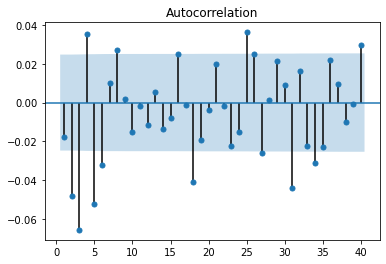

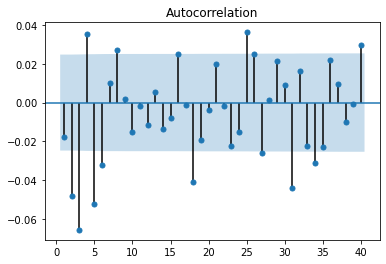

In [31]:
sgt.plot_acf(data_copy.returns,lags = 40,zero = False)

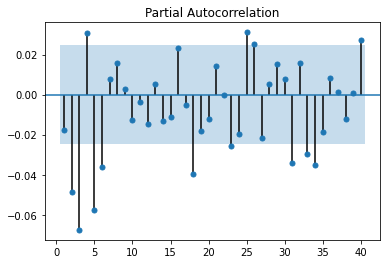

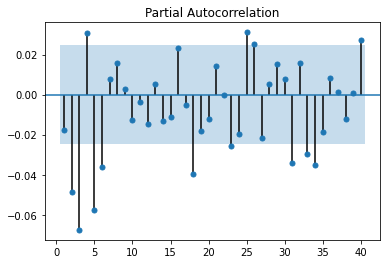

In [34]:
sgt.plot_pacf(data_copy.returns,lags = 40,zero = False,method = ('ols'))

### Fitting AR for returns

In [37]:
ar_model_returns_lag_1 = ARMA(data_copy.returns,order = (1,0))
results_model_returns_lag_1 = ar_model_returns_lag_1.fit()
results_model_returns_lag_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(1, 0)   Log Likelihood               -9597.705
Method:                       css-mle   S.D. of innovations              1.117
Date:                Fri, 31 Jul 2020   AIC                          19201.409
Time:                        10:22:29   BIC                          19221.643
Sample:                    01-10-1994   HQIC                         19208.420
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.014      1.371      0.170      -0.008       0.046
ar.L1.returns    -0.0176      0.013     -1.394      0.163      -0.042       0.007
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -56.8440           +0.0000j           56.8440            0.5000
-----------------------------------------------------------------------------
"""

In [38]:
ar_model_returns_lag_2 = ARMA(data_copy.returns,order = (2,0))
results_model_returns_lag_2 = ar_model_returns_lag_2.fit()
results_model_returns_lag_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(2, 0)   Log Likelihood               -9590.309
Method:                       css-mle   S.D. of innovations              1.115
Date:                Fri, 31 Jul 2020   AIC                          19188.618
Time:                        10:24:00   BIC                          19215.596
Sample:                    01-10-1994   HQIC                         19197.966
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.013      1.440      0.150      -0.007       0.045
ar.L1.returns    -0.0184      0.013     -1.463      0.143      -0.043       0.006
ar.L2.returns    -0.0485      0.013     -3.848      0.000      -0.073      -0.024
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.1901           -4.5361j            4.5401           -0.2567
AR.2           -0.1901           +4.5361j            4.5401            0.2567
-----------------------------------------------------------------------------
"""

In [39]:
log_likelihood_ratio(ar_model_returns_lag_1,ar_model_returns_lag_2)

0.0

In [40]:
ar_model_returns_lag_3 = ARMA(data_copy.returns,order = (3,0))
results_model_returns_lag_3 = ar_model_returns_lag_3.fit()
results_model_returns_lag_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(3, 0)   Log Likelihood               -9575.951
Method:                       css-mle   S.D. of innovations              1.113
Date:                Fri, 31 Jul 2020   AIC                          19161.902
Time:                        10:24:57   BIC                          19195.624
Sample:                    01-10-1994   HQIC                         19173.586
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.542      0.123      -0.005       0.043
ar.L1.returns    -0.0217      0.013     -1.725      0.084      -0.046       0.003
ar.L2.returns    -0.0498      0.013     -3.956      0.000      -0.074      -0.025
ar.L3.returns    -0.0676      0.013     -5.365      0.000      -0.092      -0.043
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9712           -2.1405j            2.3505           -0.1822
AR.2            0.9712           +2.1405j            2.3505            0.1822
AR.3           -2.6790           -0.0000j            2.6790           -0.5000
-----------------------------------------------------------------------------
"""

In [41]:
log_likelihood_ratio(ar_model_returns_lag_2,ar_model_returns_lag_3)

0.0

In [42]:
### Calculating the normalized returns


In [49]:
bench = data_copy.returns.iloc[0]
data_copy['norm_returns'] = data_copy.returns.div(bench).mul(100)

In [50]:
data_copy.norm_returns


date
1994-01-10    100.000000
1994-01-11    497.260711
1994-01-12    780.443046
1994-01-13    227.285567
1994-01-14   -770.139292
                 ...    
2018-01-23   -135.530649
2018-01-24    729.597320
2018-01-25    230.338698
2018-01-26   -416.456135
2018-01-29    -49.882539
Freq: B, Name: norm_returns, Length: 6276, dtype: float64

In [57]:
model_nomalized_returns_lag_1 = ARMA(data_copy.norm_returns,order = (6,0))

In [58]:
result_model_normalized_returns_lag_1 = model_nomalized_returns_lag_1.fit()

In [59]:
result_model_normalized_returns_lag_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           norm_returns   No. Observations:                 6276
Model:                     ARMA(6, 0)   Log Likelihood              -50092.416
Method:                       css-mle   S.D. of innovations            708.139
Date:                Fri, 31 Jul 2020   AIC                         100200.832
Time:                        10:37:02   BIC                         100254.788
Sample:                    01-10-1994   HQIC                        100219.527
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1199      7.388     -1.641      0.101     -26.600       2.360
ar.L1.norm_returns    -0.0200      0.013     -1.584      0.113      -0.045       0.005
ar.L2.norm_returns    -0.0510      0.013     -4.053      0.000      -0.076      -0.026
ar.L3.norm_returns    -0.0722      0.013     -5.725      0.000      -0.097      -0.047
ar.L4.norm_returns     0.0276      0.013      2.186      0.029       0.003       0.052
ar.L5.norm_returns    -0.0584      0.013     -4.635      0.000      -0.083      -0.034
ar.L6.norm_returns    -0.0360      0.013     -2.857      0.004      -0.061      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3034           -0.9330j            1.6029           -0.0989
AR.2            1.3034           +0.9330j            1.6029            0.0989
AR.3           -0.1126           -1.5943j            1.5983           -0.2612
AR.4           -0.1126           +1.5943j            1.5983            0.2612
AR.5           -2.0008           -0.4747j            2.0563           -0.4629
AR.6           -2.0008           +0.4747j            2.0563            0.4629
-----------------------------------------------------------------------------
"""

In [60]:
data_copy['residuals_lag_6'] = result_model_normalized_returns_lag_1.resid

In [61]:
data_copy.residuals_lag_6.mean()

9.070784903255247e-05

In [62]:
data_copy.residuals_lag_6.var()

501543.2587929755

In [63]:
sts.adfuller(data_copy.residuals_lag_6)

(-14.994308600882869,
 1.1135056007644313e-27,
 34,
 6241,
 {'1%': -3.431398228116075,
  '5%': -2.8620032237533897,
  '10%': -2.5670165710764503},
 99644.04977909393)

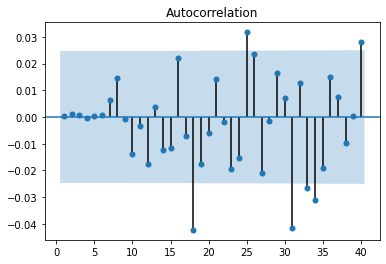

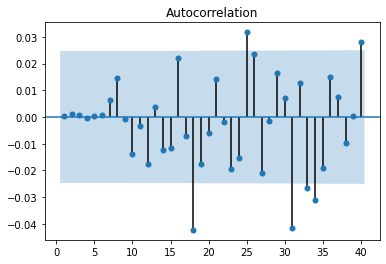

In [64]:
sgt.plot_acf(data_copy.residuals_lag_6,lags = 40,zero = False)

Text(0.5, 1.0, 'Residual plot')

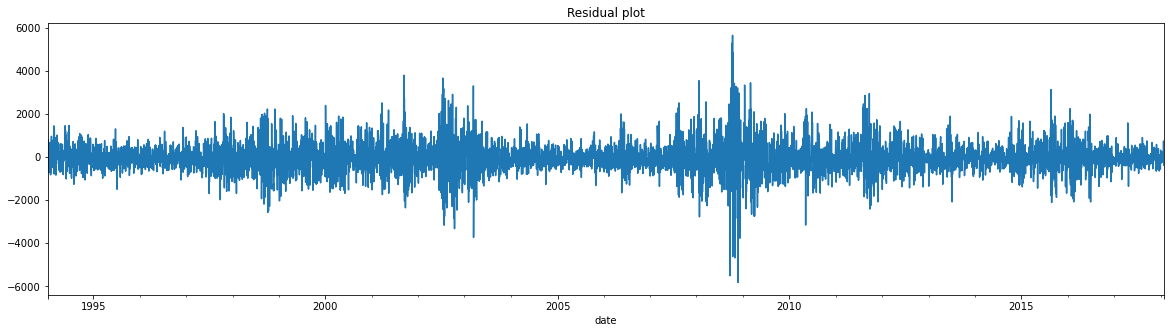

In [67]:
plt.figure(figsize = (20,5))
data_copy.residuals_lag_6[1:].plot()
plt.title('Residual plot')